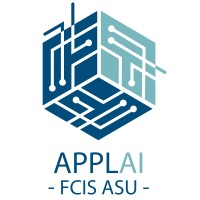

# quick overview

**Data describtion**:

-  **CCA3**: 3 Digit Country/Territories Code.
-  **Rank**: Rank by Population.
-  **2021 Population**: Population of the Country/Territories in the year 2021.
-  **2020 Population**: Population of the Country/Territories in the year 2020.
-  **Area (km²)**: Area size of the Country/Territories in square kilometer.
-  **Density (per km²)**: Population Density per square kilometer.
-  **Growth Rate**: Population Growth Rate by Country/Territories.
-  **World Population Percentage**: The population percentage by each Country/Territories.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/2021_population.csv")

In [ ]:
#renaming our features to a describtive
df = df.rename(columns={'country': 'country name', '2021_last_updated': '2021 population' , 'density_sq_km':'density sq km', 'growth_rate':'growth rate' , 'world_%': 'population ratio' ,'2020_population': "2020 population"  })

In [ ]:
df.head()

,iso_code,country name,2021 population,2020 population,area,density sq km,growth rate,population ratio,rank
0,CHN,China,"1,446,364,682","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,399,367,516","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"333,777,266","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"277,625,249","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,103,913","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


In [ ]:
df.shape

(224, 9)

we dont need both iso code and country name so, we will use the name only

In [ ]:
df.drop("iso_code",axis=1,inplace =True)

# data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country name      224 non-null    object
 1   2021 population   224 non-null    object
 2   2020 population   224 non-null    object
 3   area              224 non-null    object
 4   density sq km     224 non-null    object
 5   growth rate       224 non-null    object
 6   population ratio  224 non-null    object
 7   rank              224 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 14.1+ KB


we shall try to handle our data types

In [ ]:
def replace(data, col_name):

    data[col_name] = data[col_name].str.replace(',' , '')
    data[col_name] = data[col_name].str.replace("/sq_km", "")
    data[col_name] = data[col_name].str.replace("sq_km", "")
    data[col_name] = data[col_name].str.replace("%", "")
    data[col_name] = pd.to_numeric(data[col_name])

In [ ]:
replace(df, '2021 population')
replace(df, '2020 population')
replace(df, 'area')
replace(df, 'growth rate')
replace(df, 'population ratio')
replace(df, 'density sq km')

In [ ]:
df.describe()

,2021 population,2020 population,area,density sq km,growth rate,population ratio,rank
count,2.240000e+02,2.240000e+02,2.240000e+02,224.000000,224.000000,224.00000,224.000000
mean,3.486105e+07,3.436352e+07,5.949485e+05,462.174107,1.057946,0.44067,115.013393
std,1.395603e+08,1.382031e+08,1.793677e+06,2114.519435,1.053640,1.76677,66.844876
min,8.000000e+02,8.010000e+02,1.000000e+00,0.000000,-1.290000,0.00000,1.000000
25%,5.866808e+05,5.789708e+05,4.889250e+03,35.750000,0.295000,0.01000,57.750000
50%,6.037210e+06,5.940771e+06,8.523550e+04,95.500000,0.920000,0.07500,113.500000
75%,2.228932e+07,2.201413e+07,4.467625e+05,240.000000,1.770000,0.27750,171.250000
max,1.446365e+09,1.439324e+09,1.709824e+07,21946.000000,4.430000,18.34000,232.000000


In [ ]:
df.head()

,country name,2021 population,2020 population,area,density sq km,growth rate,population ratio,rank
0,China,1446364682,1439323776,9706961,149,0.34,18.34,1
1,India,1399367516,1380004385,3287590,424,0.97,17.69,2
2,United States,333777266,331002651,9372610,36,0.58,4.23,3
3,Indonesia,277625249,273523615,1904569,145,1.04,3.51,4
4,Pakistan,227103913,220892340,881912,255,1.95,2.86,5


# outliers

In [ ]:
columns = ['2021 population', '2020 population', 'area','density sq km', 'growth rate', 'population ratio', 'rank']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    

Number of outliers in 2021 population: 26
Number of outliers in 2020 population: 25
Number of outliers in area: 25
Number of outliers in density sq km: 21
Number of outliers in growth rate: 1
Number of outliers in population ratio: 26
Number of outliers in rank: 0


<Axes: >

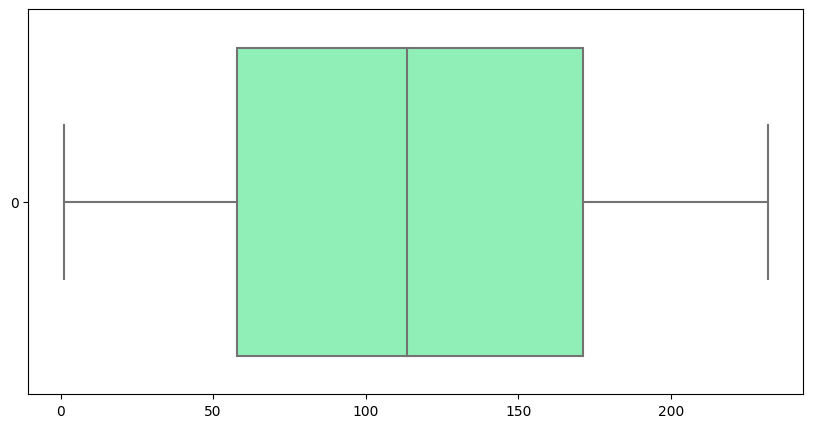

In [ ]:
# Checking outliers
plt.figure(figsize= (10,5))
sns.boxplot(data=df['rank'],palette='rainbow',orient='h')

<Axes: >

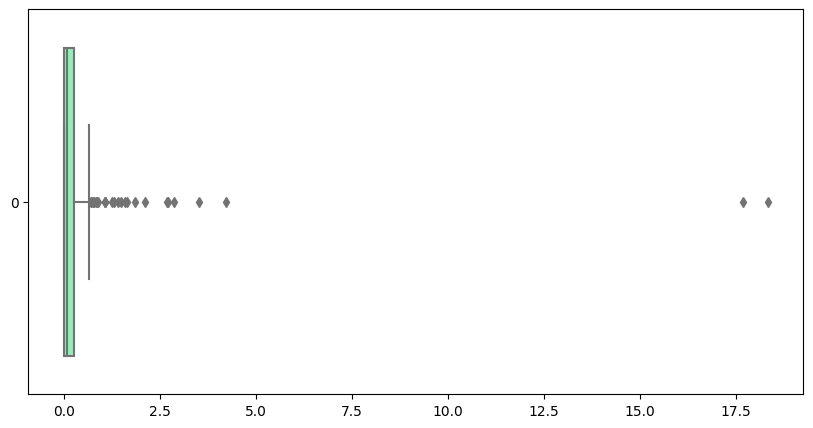

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df['population ratio'],palette='rainbow',orient='h')

<Axes: >

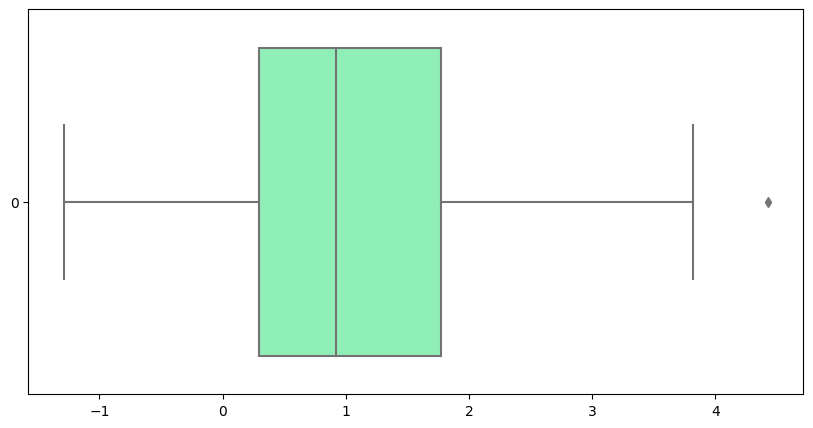

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df['growth rate'],palette='rainbow',orient='h')

<Axes: >

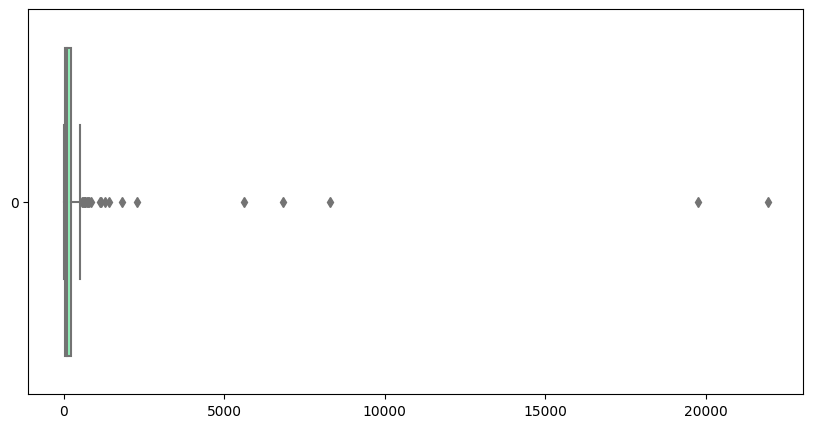

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df['density sq km'],palette='rainbow',orient='h')

<Axes: >

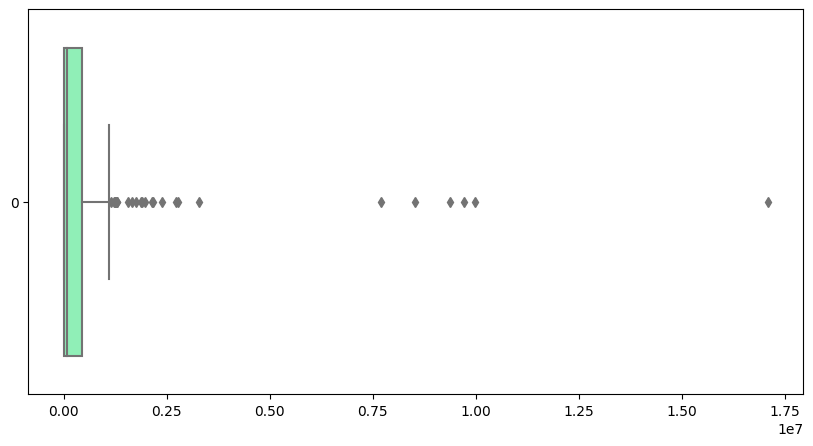

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df['area'],palette='rainbow',orient='h')

<Axes: >

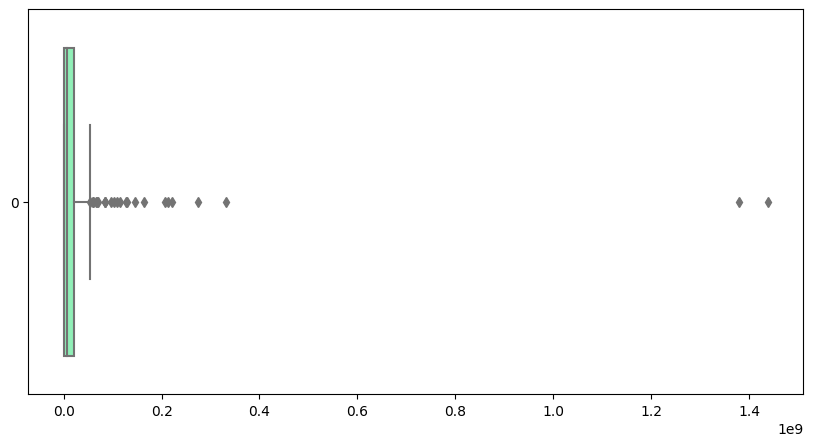

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df['2020 population'],palette='rainbow',orient='h')

<Axes: >

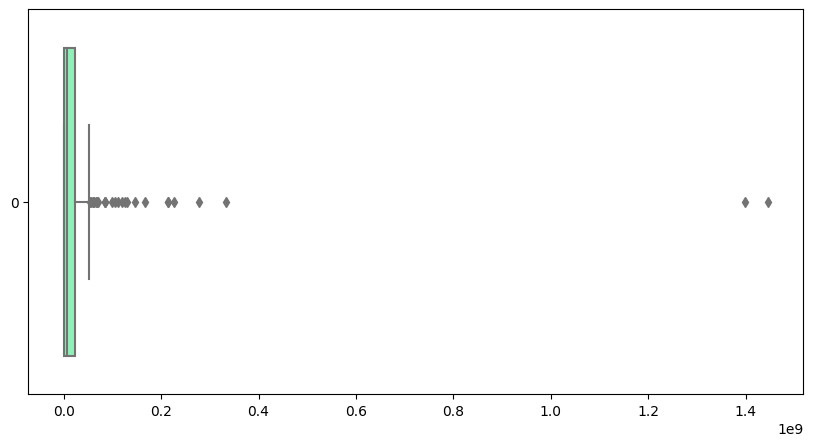

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df['2021 population'],palette='rainbow',orient='h')

conclusion:

all outliers make sense so we wont remove any of them

# exporting data set for analysis

In [ ]:
df.to_csv("analysis.csv")

<span style="color: #02d9fa">

# Credits

---

## Content created by [ApplAi](https://www.linkedin.com/company/applaiasu/mycompany/)


**Directed By:**
- Director of Machine Learning and Training Department: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)

**Team leader:**
- [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett)

**Technical Team:**
- [yara ihab](https://www.linkedin.com/in/yara-ihabb/)
- [marina atef](https://www.linkedin.com/in/marina-atef-80a882263)
- [ahmed yasser](https://www.linkedin.com/in/ahmed-yasser-5533b5258)
- [mohamed samy](https://www.linkedin.com/in/mohamed-samy10/)

## Date of creation

- **30 April 2023**
---
</span>